<a href="https://colab.research.google.com/github/PedroHenriqueS22/Praticas_Analise_Dados_DNC/blob/main/Prepare_dataset_modelagem_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prepare seu dataset para modelagem de dados

# Contexto

Uma empresa do ramo de e-commerce contratou você para levantar os indicadores de recência, frequência e ticket médio (RFM) dos seus clientes.

* R (Recency): Tempo que o cliente realizou a última compra (em dias)
* F (Frequency): Quantidade de compras realizadas pelo cliente
* M (Monetary): Valor do ticket médio gasto pelo cliente

- Ticket médio = média do total gasto por pedido para cada cliente.

A partir de uma base de dados (arquivo csv) deve-se construir
um código em Python que gera um output também csv, porém contendo apenas a
identificação do cliente e métricas RFM.

# Sobre os dados

* A tabela contém informações de compras de um e-commerce em 37 países.
* Contém a identificação do cliente e os dados da compra.

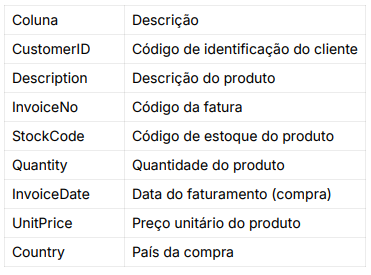



In [ ]:
!pip install ydata-profiling

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from google.colab import files
from ydata_profiling import ProfileReport
from sklearn.preprocessing import scale

# 1. Lendo o arquivo e inspecionando os dados

In [ ]:
# Fazendo Upload do arquivo

upload = files.upload()

Saving Data.csv to Data.csv


In [ ]:
# DataFrame

df = pd.read_csv("Data.csv", sep=",")

# Visualizando as primeiras 5 linhas da base de dados

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 08:26,3.39,17850.0,United Kingdom


In [ ]:
# Verificando as estatísticas da base de dados

df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611121,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
# Verificando as informações da base de dados, verificando dados nulos e os tipos de variáveis presentes na base de dados

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
# Gerando um relatório completo sobre a base de dados

df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# 2. Verificando valores faltantes na identificação do cliente

In [ ]:
# Identificando e mostrando valores nulos

df_missing = (
  df.isna().sum()
  .to_frame('missing_count')
  .join((df.isna().sum() / df.shape[0]).to_frame('missing_pct'))
  .sort_values('missing_count', ascending=False)
)

df_missing.style.format('{:.2%}', subset=['missing_pct'])

,missing_count,missing_pct
CustomerID,135080,24.93%
Description,1454,0.27%
InvoiceNo,0,0.00%
StockCode,0,0.00%
Quantity,0,0.00%
InvoiceDate,0,0.00%
UnitPrice,0,0.00%
Country,0,0.00%


In [ ]:
# Removendo os valores nulos

df.dropna(inplace=True)

# Verificando as colunas com valores nulos

df.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


# 3. Verificando os preços unitários e quantidade de produtos iguais ou inferior a 0

In [ ]:
# Filtro para verificar se existem dados nulos ou menor que zero na coluna de preços

df[df.UnitPrice <= 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,12/5/2010 14:02,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,12/16/2010 14:36,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,12/21/2010 13:45,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,1/6/2011 16:41,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,1/6/2011 16:41,0.0,13081.0,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,1/13/2011 15:10,0.0,15107.0,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2/10/2011 13:08,0.0,17560.0,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,3/23/2011 10:25,0.0,13239.0,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,3/30/2011 12:45,0.0,13113.0,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,4/4/2011 14:42,0.0,14410.0,United Kingdom


In [ ]:
# Filtrando o dataset apenas para conter preços acima de zero e atribuindo como o novo df

df = df[df.UnitPrice > 0]

In [ ]:
# Filtro para verificar se existem dados nulos ou menor que zero na coluna de quantidade

df[df.Quantity <= 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 09:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 09:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 09:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [ ]:
# Filtrando o dataset apenas para conter quantidade acima de zero

df = df[df.Quantity > 0]

# 4. Verificando se existem linhas duplicadas

In [ ]:
# Identificando valores duplicados

df[df.duplicated(keep=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


In [ ]:
# Identificando quantos valores duplicados há em cada duplicata

(
  df
 .groupby(df.columns.tolist(), dropna=False)
 .size()
 .to_frame('n_duplicates')
 .query('n_duplicates>1')
 .sort_values('n_duplicates', ascending=False)
 .head(5)
)

n_duplicates
InvoiceNo StockCode Description                         Quantity InvoiceDate      UnitPrice CustomerID Country                     
555524    22698     PINK REGENCY TEACUP AND SAUCER      1        6/5/2011 11:37   2.95      16923.0    United Kingdom            20
          22697     GREEN REGENCY TEACUP AND SAUCER     1        6/5/2011 11:37   2.95      16923.0    United Kingdom            12
572861    22775     PURPLE DRAWERKNOB ACRYLIC EDWARDIAN 12       10/26/2011 12:46 1.25      14102.0    United Kingdom             8
541266    21755     LOVE BUILDING BLOCK WORD            1        1/16/2011 16:25  5.95      15673.0    United Kingdom             6
538514    21756     BATH BUILDING BLOCK WORD            1        12/12/2010 14:27 5.95      15044.0    United Kingdom             6

In [ ]:
# Removendo valores duplicados

df.drop_duplicates(inplace=True)

# 5. Verificando e corrijindo os tipos de dados das colunas

* Na tabela abaixo temos as colunas e o tipo esperado de dado

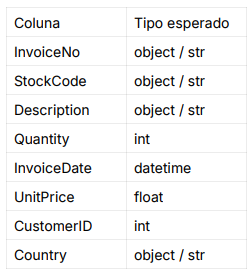




In [ ]:
# Verificando os tipos de variáveis presentes na base de dados

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392692 non-null  object 
 1   StockCode    392692 non-null  object 
 2   Description  392692 non-null  object 
 3   Quantity     392692 non-null  int64  
 4   InvoiceDate  392692 non-null  object 
 5   UnitPrice    392692 non-null  float64
 6   CustomerID   392692 non-null  float64
 7   Country      392692 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.0+ MB


In [ ]:
# Corrijindo os tipos de dados do CustomerID para int e InvoiceDate para datetime

df['CustomerID'] = df['CustomerID'].astype(int)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']).dt.date
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
# Verificando os tipos de variáveis presentes na base de dados

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  int64         
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.0+ MB


In [ ]:
# Verificando a base de dados

df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680,France


# 6. Tratando os outliers

* Abaixo foi feito o uso do boxplot para observar os outliers, pois é uma maneira mais prática.




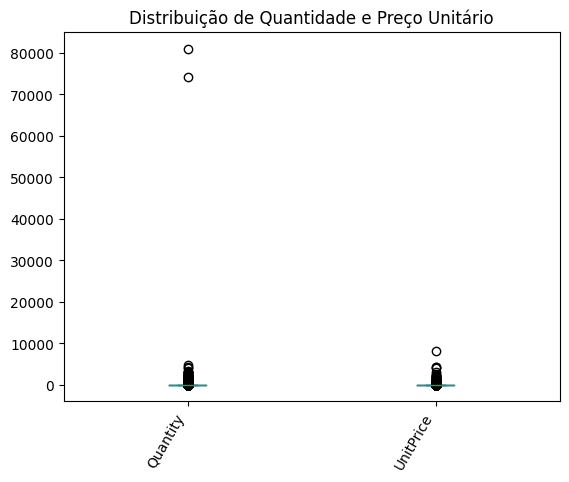

In [ ]:
# Box plot

df[['Quantity', 'UnitPrice']].plot.box()
plt.xticks(rotation=60, ha='right');
plt.title('Distribuição de Quantidade e Preço Unitário');

* Padronizando estes dados apenas para visualização usando a função scale da biblioteca sklearn.preprocessing:



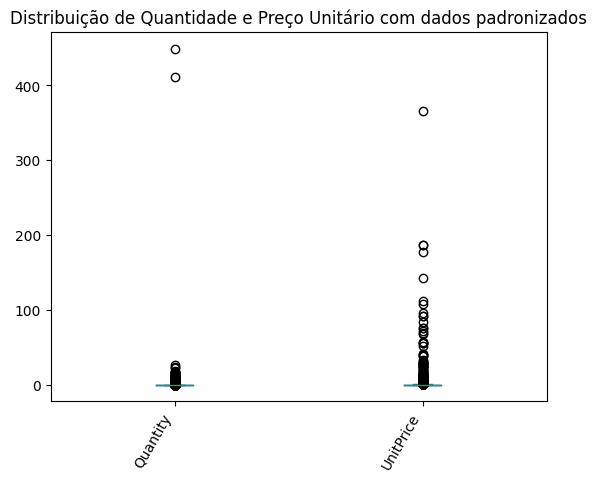

In [ ]:
# Box plot com dados padronizados

df[['Quantity', 'UnitPrice']].apply(scale).plot.box()
plt.xticks(rotation=60, ha='right');
plt.title('Distribuição de Quantidade e Preço Unitário com dados padronizados');

* Vamos considerar estes valores como erros, então iremos remover os outliers extremos em que a quantidade do item na compra é superior a 10.000 e o preço unitário é maior que 5.000.





In [ ]:
# Utilizando o filtro para remover os outliers e atribuindo como novo df

df = df[(df['Quantity'] <= 10000) & (df['UnitPrice'] <= 5000)]

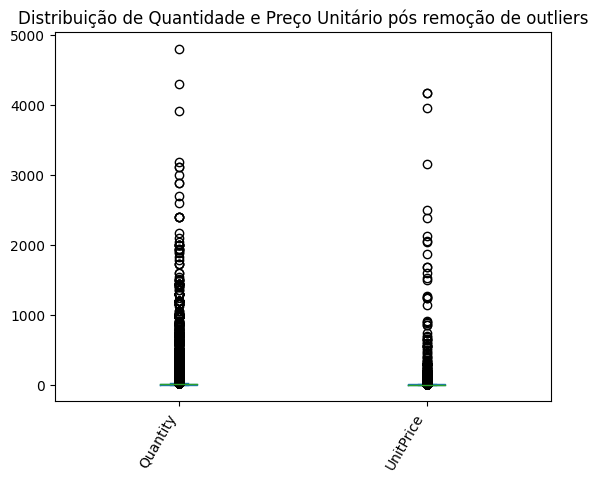

In [ ]:
# Box plot para visualização pós remoção de outliers

df[['Quantity', 'UnitPrice']].plot.box()
plt.xticks(rotation=60, ha='right');
plt.title('Distribuição de Quantidade e Preço Unitário pós remoção de outliers');

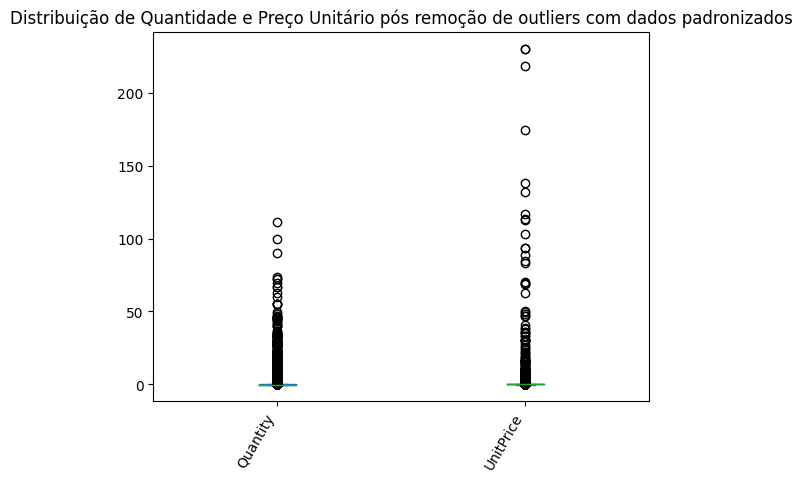

In [ ]:
# Box plot com dados padronizados

df[['Quantity', 'UnitPrice']].apply(scale).plot.box()
plt.xticks(rotation=60, ha='right');
plt.title('Distribuição de Quantidade e Preço Unitário pós remoção de outliers com dados padronizados');

# 7. Criando uma coluna adicional


* Utilizando as colunas Quantity e UnitPrice, foi criado uma coluna adicional com o preço total da compra




In [ ]:
# Criando nova coluna

df['Total_Price'] = df['Quantity'] * df['UnitPrice']

df

<ipython-input-225-d4196b62ee3f>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680,France,16.60


# 8.  Calculando a última data

In [ ]:
# Utilizando a função max() para calcular a data da última compra no dataset.

Ultima_data = df['InvoiceDate'].max()
print(Ultima_data)

2011-12-09 00:00:00


# 9. Plotando gráficos

## Gráficos:

* Top 10 países com maior valor em vendas
* Top 10 produtos mais vendidos
* Valor de venda total por mês
* Valor de venda total por mês e por país (considerando apenas os top 10)




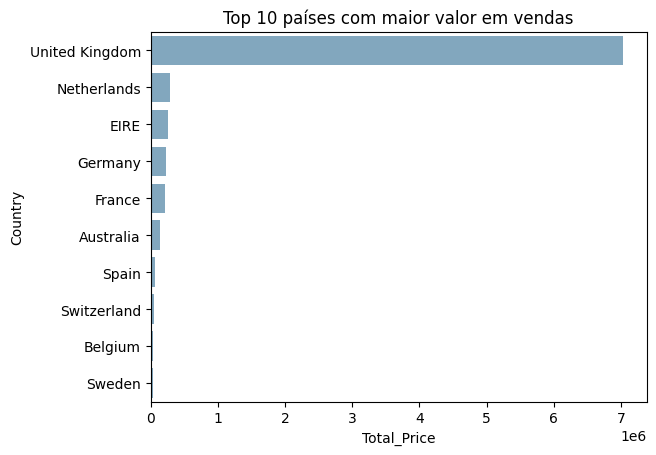

In [ ]:
# Cálculo do Top 10 países com maior valor em vendas

top10_paises = df.groupby('Country').sum('Total_Price').sort_values(by='Total_Price', ascending=False).head(10)

# Plotando o gráfico

sns.barplot(data=top10_paises, y='Country', x='Total_Price', color='#78AAC8');
plt.title('Top 10 países com maior valor em vendas', fontsize=12);

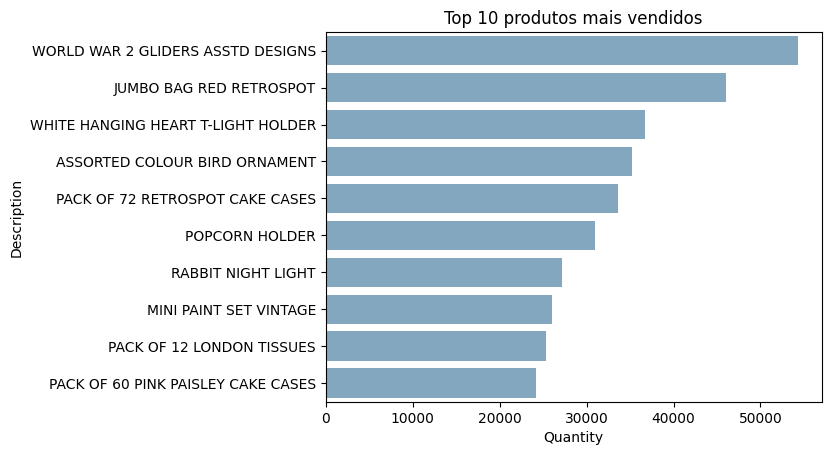

In [ ]:
# Cálculo do Top 10 produtos mais vendidos

top10_produtos = df.groupby('Description').sum('Quantity').sort_values(by = 'Quantity', ascending=False).head(10)

# Plotando o gráfico

sns.barplot(data=top10_produtos, y='Description', x='Quantity', color='#78AAC8');
plt.title('Top 10 produtos mais vendidos', fontsize=12);

In [ ]:
# Cálculo do valor de venda total por mês

df['Mes'] = df['InvoiceDate'].dt.month
Valor_vendas_mes = df.groupby('Mes')['Total_Price'].sum().reset_index().sort_values(by='Total_Price', ascending=False)

# Plotando o gráfico

fig = px.bar(
    Valor_vendas_mes,
    x='Mes',
    y='Total_Price',
    title='Valor de Venda Total por Mês',
    labels={
        'Mes': 'Month',
        'Total_Price': 'Total_Price'
    },
    color_discrete_sequence=['#78AAC8']
)

# Configurações do layout

fig.update_layout(
    title_x=0.5
)

# Configurações do eixo X

fig.update_xaxes(
    tickmode='linear',
    dtick=1
)

fig

<ipython-input-229-3572983507e5>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Cálculo do valor de venda total por mês e por país (considerando apenas os top 10)

Valor_vendas_mes_pais = df.groupby([Mes, 'Country'])['Total_Price'].sum().reset_index()
Top10_Paises = df.groupby('Country')['Total_Price'].sum().sort_values(ascending=False).head(10).index
Valor_venda_total_mes_pais = Valor_vendas_mes_pais[Valor_vendas_mes_pais['Country'].isin(Top10_Paises)]

# Plotando o gráfico

fig = px.bar(
    Valor_venda_total_mes_pais,
    x='InvoiceDate',
    y='Total_Price',
    color='Country'
)

# Configurações do layout

fig.update_layout(
    barmode='group',
    title_text='Total de Vendas por Mês e por País',
    title_x=0.5,
    xaxis_title='Month',
    legend=dict(
        x=1.01,
        y=0.75,
        title_text='Country:'
    )
)

# Configurações do eixo X

fig.update_xaxes(
    tickmode='linear',
    dtick=1
)

fig

# 10. Cálculo do RFM

# RFM:

* R é a recência, diferença em dias da última compra do cliente e da última compra disponível no conjunto de dados, que calcularam previamente;
* F é a frequência, ou seja, a quantidade de compras feitas pelo cliente;
* M é o ticket médio, ou seja, a média das compras feitas pelo cliente.




In [ ]:
# Agrupando os dados por cliente e pedido/compra (InvoiceNo) e obtendo a data e o preço total do pedido.

agrupamento_recencia = df.groupby(['CustomerID', 'InvoiceNo', 'InvoiceDate'])['Total_Price'].agg('sum').reset_index()

agrupamento_recencia

,CustomerID,InvoiceNo,InvoiceDate,Total_Price
0,12347,537626,2010-12-07,711.79
1,12347,542237,2011-01-26,475.39
2,12347,549222,2011-04-07,636.25
3,12347,556201,2011-06-09,382.52
4,12347,562032,2011-08-02,584.91
...,...,...,...,...
18524,18283,579673,2011-11-30,220.31
18525,18283,580872,2011-12-06,208.00
18526,18287,554065,2011-05-22,765.28
18527,18287,570715,2011-10-12,1001.32


In [ ]:
# Cálculo da recência

df_r = agrupamento_recencia.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Ultima_data - x.max()).days}).reset_index()
df_r.columns = ['CustomerID', 'Recência']

df_r

,CustomerID,Recência
0,12347,2
1,12348,75
2,12349,18
3,12350,310
4,12352,36
...,...,...
4332,18280,277
4333,18281,180
4334,18282,7
4335,18283,3


In [ ]:
# Cálculo da frequência

df_f = df.groupby('CustomerID').agg({'Quantity': lambda x: x.sum()}).reset_index()
df_f.columns = ['CustomerID', 'Frequency']
df_f

,CustomerID,Frequency
0,12347,2458
1,12348,2341
2,12349,631
3,12350,197
4,12352,536
...,...,...
4332,18280,45
4333,18281,54
4334,18282,103
4335,18283,1357


In [ ]:
# Cálculo do Ticket Médio

df_TM = df.groupby('CustomerID').agg({'Total_Price': 'mean'}).reset_index()
df_TM.columns = ['CustomerID', 'Ticket_Médio']

df_TM

,CustomerID,Ticket_Médio
0,12347,23.681319
1,12348,57.975484
2,12349,24.076027
3,12350,19.670588
4,12352,29.482824
...,...,...
4332,18280,18.060000
4333,18281,11.545714
4334,18282,14.837500
4335,18283,2.837074


In [ ]:
# Utilizando o merge para unir em uma tabela a Recência, Frequência e o Ticket Médio

RFM_Tabela_Final = df_r.merge(df_f, on='CustomerID').merge(df_TM, on='CustomerID')

RFM_Tabela_Final

,CustomerID,Recência,Frequency,Ticket_Médio
0,12347,2,2458,23.681319
1,12348,75,2341,57.975484
2,12349,18,631,24.076027
3,12350,310,197,19.670588
4,12352,36,536,29.482824
...,...,...,...,...
4332,18280,277,45,18.060000
4333,18281,180,54,11.545714
4334,18282,7,103,14.837500
4335,18283,3,1357,2.837074


In [ ]:
# Código para gerar Output em CSV contendo apenas a identificação do cliente e as métricas RFM

CSV = input("Você gostaria de baixar o arquivo CSV? (s/n): ").strip().lower()

if CSV == 's':
  RFM_Tabela_Final.to_csv('tabela_final.csv', index=False)
  print("Arquivo CSV gerado com sucesso!")



Você gostaria de baixar o arquivo CSV? (s/n): s
Arquivo CSV gerado com sucesso!
